In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyfits as pyf
import pres_style, os

In [83]:
# catalog tables
snr = genfromtxt("snr.txt", dtype=None, names=True)
cat = genfromtxt("catalog.txt", dtype=None, names=True)

# results tables
odir = os.path.expandvars("$master/inputs/real_deal7/outs/spec/")
Pa_hSNR = genfromtxt(odir+"ovcida2/dynbas_output.log", dtype=None, names=True)
Pa_lSNR = genfromtxt(odir+"chapi/dynbas_output.log", dtype=None, names=True)

Pa_hSNR["input_file"] = ["spSpec"+name.lstrip("dynbasfit_processed_SPEC_").replace(".log", ".fit") for name in Pa_hSNR["input_file"]]
Pa_lSNR["input_file"] = ["spSpec"+name.lstrip("dynbasfit_processed_SPEC_").replace(".log", ".fit") for name in Pa_lSNR["input_file"]]

# match tables
in_Pa_hSNR = array([galaxy in Pa_hSNR["input_file"] for galaxy in snr["input_file"]], dtype=bool)
in_Pa_lSNR = array([galaxy in Pa_lSNR["input_file"] for galaxy in snr["input_file"]], dtype=bool)

print "matched all snr in Pa_hSNR?", all(snr[in_Pa_hSNR]["input_file"]==Pa_hSNR["input_file"])
print "matched all snr in Pa_lSNR?", all(snr[in_Pa_lSNR]["input_file"]==Pa_lSNR["input_file"])

matched all snr in Pa_hSNR? True
matched all snr in Pa_lSNR? True


In [35]:
rdir = "ovcida2/"
res = Pa_hSNR
in_res = in_Pa_hSNR

2.62557077626


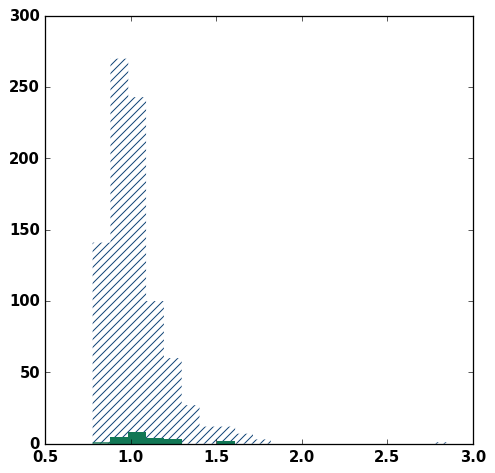

In [63]:
mask_Zroof = (res["log_Z_L_mod"]>=0.38)

dt = (snr["snr_CaHK"][in_res],
      snr["snr_CaHK"][in_res][mask_Zroof])

dt = (res["chi_sq"],
      res["chi_sq"][mask_Zroof])

rg = (min(dt[0].min(), dt[1].min()),
      max(dt[0].max(), dt[1].max()))

hist(dt[0], 20, hatch="///", histtype="step", range=rg)
hist(dt[1], 20, range=rg)

print mask_Zroof.sum()*100./res.size

(-1, 0.4)

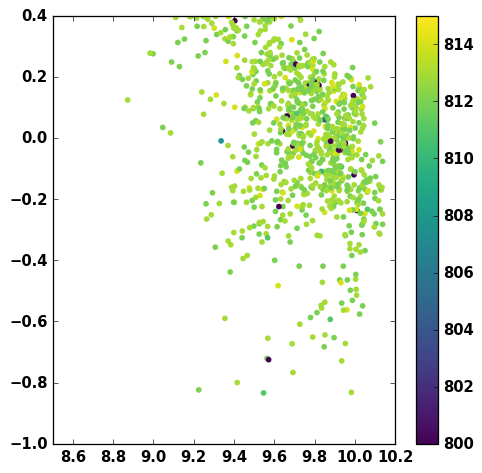

In [107]:
scatter(res["log_t_L_mod"], res["log_Z_L_mod"], c=snr["npix_Zfea"][in_res], lw=0, vmin=800, vmax=815, cmap=cm.viridis)
colorbar()

xlim(8.5, 10.2)
ylim(-1, 0.4)

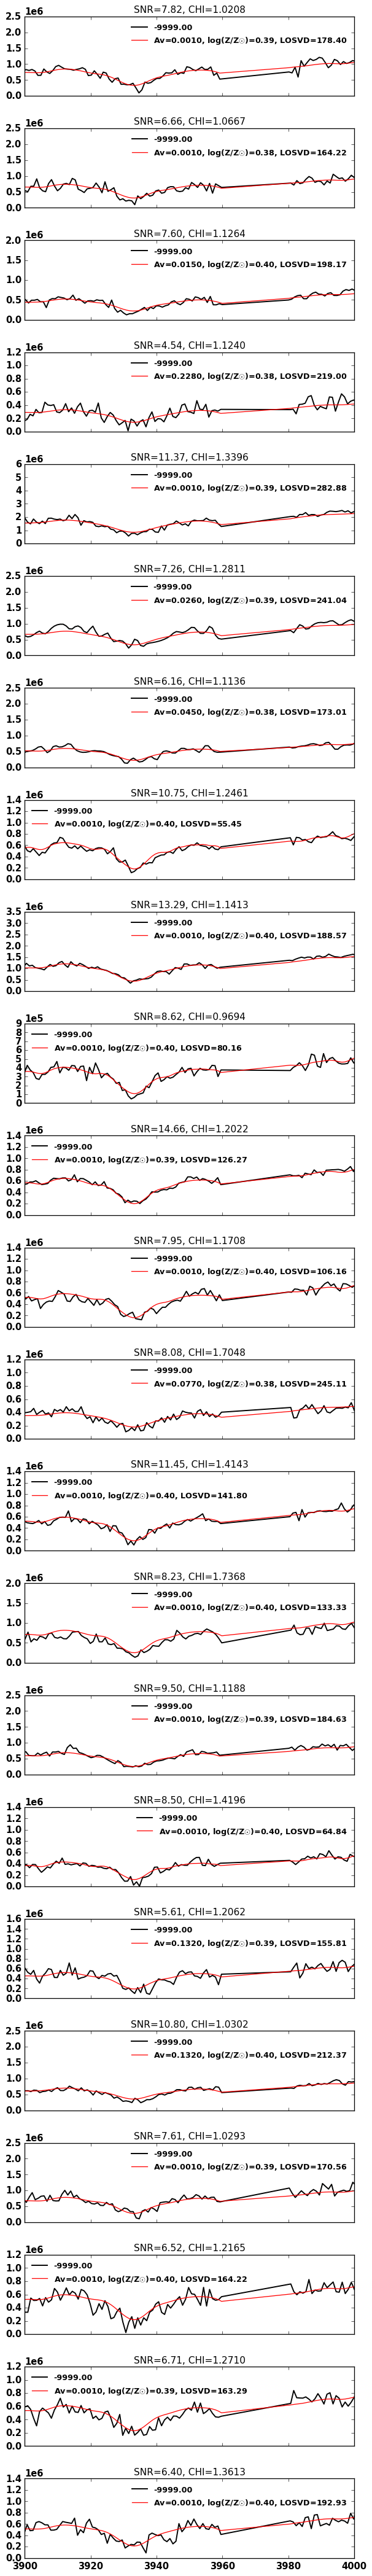

In [82]:
slist = sorted([odir+rdir+"dynbasfit_processed_SPEC_"+name.replace(".fit", ".log")
                for name in res["input_file"][mask_Zroof]])
nseds = 23

fig, axs = subplots(nseds, 1, sharex=True, figsize=(7, nseds*2))
wlr = xlim(3900, 4000)

for i, fname in enumerate(slist[:nseds]):
    f = pyf.open(os.path.expandvars("$master/inputs/real_deal7/fits/"+res["input_file"][mask_Zroof][i]+".gz"))
    wl, fl, sg, md = loadtxt(fname, usecols=(0,1,2,2+res["gen"][mask_Zroof][i]), unpack=True)
    
    mask_fl = fl>0
    mask_wl = (wl>=wlr[0])&(wl<=wlr[1])&mask_fl
    axs[i].plot(wl[mask_fl], fl[mask_fl], "-k", lw=1.5, label="{0:.2f}".format(f[0].header["VEL_DIS"]))
    axs[i].plot(wl[mask_fl], md[mask_fl], "-r", lw=1,
                    label="Av={0:.4f}, log(Z/Z$\odot$)={1:.2f}, LOSVD={2:.2f}".format(res["Av_mod"][mask_Zroof][i],
                                                                                      res["log_Z_L_mod"][mask_Zroof][i],
                                                                                      res["LOSVD_mod"][mask_Zroof][i]))

    SNR = median(fl[mask_wl]/sg[mask_wl])
    CHI = sum(((fl-md)[mask_fl]/sg[mask_fl])**2)/(mask_fl.sum()-1-res["gen"][mask_Zroof][i])

    axs[i].legend(loc=0, fontsize=10)
    axs[i].set_title("SNR={0:.2f}, CHI={1:.4f}".format(SNR, CHI), fontsize=12)
    axs[i].yaxis.get_major_formatter().set_powerlimits((0, 1))

fig.tight_layout()